# Predicting Bike Rental Count

-  The objective of this Case is Predication of bike rental count on daily based on the environmental and seasonal settings

In [1]:
# loading the required libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from fancyimpute import KNN
from scipy.stats import chi2_contingency
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics

Using TensorFlow backend.


In [2]:
# set the working directory
os.chdir('C:/Users/admin/Documents/Python Files')
os.getcwd()

'C:\\Users\\admin\\Documents\\Python Files'

The details of data attributes in the dataset are as follows:
-  instant: Record index
-  dteday: Date
-  season: Season (1:springer, 2:summer, 3:fall, 4:winter)
-  yr: Year (0: 2011, 1:2012)
-  mnth: Month (1 to 12)
-  holiday: weather day is holiday or not (extracted fromHoliday Schedule)
-  weekday: Day of the week
-  workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
-  weathersit: (extracted fromFreemeteo)
    -   1: Clear, Few clouds, Partly cloudy, Partly cloudy
    -   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    -   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scatteredclouds
    -   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
-  temp: Normalized temperature in Celsius. The values are derived via(t-t_min)/(t_max-t_min),t_min=-8, t_max=+39 (only in hourly scale)
-  atemp: Normalized feeling temperature in Celsius. The values are derived via(t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
-  hum: Normalized humidity. The values are divided to 100 (max)
-  windspeed: Normalized wind speed. The values are divided to 67 (max)
-  casual: count of casual users
-  registered: count of registered users
-  cnt: count of total rental bikes including both casual and registered

In [3]:
# Importing data
df = pd.read_csv('day.csv',index_col='dteday',parse_dates=True,infer_datetime_format=True,dayfirst=True)
# Dropping the 1st column i.e. 'instant' Coz it is seems statisticaly insignificant
df=df.drop('instant',axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.describe(),df.info()

-  We have used dteday as index and converted it into DatetimeIndex 

In [ ]:
type(df.index)

## Graphical EDA - Data Visualization 

In [4]:
# setting up the sns for plots
sns.set(style='darkgrid',palette='Set1')

In [ ]:
plt.figure(figsize=(10,10))
_ = sns.violinplot(x='weekday',y='cnt',data=df,inner=None,color='lightgray')
_ = sns.stripplot(x='weekday',y='cnt',data=df,size=4,jitter=True)
plt.title('')
plt.show()

-  We will plot some Bee Swarmplots coz unlike histogram there is no binnig bias involved

In [ ]:
plt.figure(figsize=(25,25))
plt.subplot(321)
_ = sns.swarmplot(x='season',y='cnt',data=df,hue='workingday',size=8)
plt.title('Bike Count w.r.t season and working day')
plt.subplot(322)
_ = sns.swarmplot(x='weekday',y='cnt',data=df,hue='workingday',size=8)
plt.title('Bike Count w.r.t weekday and working day')
plt.subplot(323)
_ = sns.swarmplot(x='holiday',y='cnt',data=df,hue='workingday',size=8)
plt.title('Bike Count w.r.t holiday and working day')
plt.subplot(324)
_ = sns.swarmplot(x='weathersit',y='cnt',data=df,hue='workingday',size=8)
plt.title('Bike Count w.r.t weathersit and working day')
plt.subplot(325)
_ = sns.swarmplot(x='yr',y='cnt',data=df,hue='workingday',size=8)
plt.title('Bike Count w.r.t yr and working day')
plt.subplot(326)
_ = sns.swarmplot(x='mnth',y='cnt',data=df,hue='workingday',size=8)
plt.title('Bike Count w.r.t mnth and working day')
plt.show()

In [ ]:
temp = df['temp']
temp=temp['2011']
atemp = df['atemp']
atemp = atemp['2011']
hum = df['hum']
hum = hum['2011']
windspeed = df['windspeed']
windspeed = windspeed['2011']
temp_index = temp.index[::30]
labels = temp_index.strftime('%b %d')
labels

-  Now we will do some Time Series Analysis

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(411)
plt.plot(temp,color = 'r',label = 'temp')
plt.legend(loc = 1)
plt.subplot(412)
plt.plot(atemp,color = 'b',label = 'atemp')
plt.legend(loc = 1)
plt.subplot(413)
plt.plot(hum,color = 'k',label = 'humidity')
plt.legend(loc = 1)
plt.subplot(414)
plt.plot(windspeed,color = 'c',label = 'windspeed')
plt.xticks(temp_index,labels,rotation=60)
plt.legend(loc = 1)
plt.show()

-  Now we will see at some Jointplots.
-  They are used for Bivariate Analysis.
-  Here we have plotted Scatter plot with Regression line between 2 variables along with separate Bar plots of both variables.
-  Also we have annotated pearson correlation coefficient and p value.

In [ ]:
_ = sns.jointplot(x='cnt',y='temp',data=df,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

In [ ]:
_ = sns.jointplot(x='cnt',y='atemp',data=df,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

In [ ]:
_ = sns.jointplot(x='cnt',y='hum',data=df,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

In [ ]:
_ = sns.jointplot(x='cnt',y='windspeed',data=df,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

## EDA - Data type conversion

In [5]:
cat_var=['season','holiday','weekday','workingday','weathersit','yr','mnth']
df[cat_var]=df[cat_var].apply(lambda x: x.astype('category') )
num_var=['temp','atemp','hum','windspeed','cnt']

In [ ]:
#plt.title('Pairplot for all numerical variables')
_ =sns.pairplot(data=df[num_var],kind='scatter')
_.fig.suptitle('Pairwise plot of all numerical variables')
plt.show()

## Missing Value Analysis 

In [ ]:
pd.DataFrame(df.isnull().sum())

In [ ]:
df.info()

## Outlier Analysis using Boxplot

-  Univariate Boxplots

In [ ]:
for i in num_var:
    sns.boxplot(y=i,data=df)
    plt.title('Boxplot of '+i)
    plt.show()

-  Bivariate Boxplots

In [ ]:
for a in cat_var:
    for b in num_var:
        _ = sns.boxplot(x=a,y=b,data=df)
        plt.title('Boxplot of '+b+' w.r.t '+a)
        plt.show()

## Outlier Treatment
-  As we can see from the above Boxplots only 'hum' and 'windspeed' columns in the dataset has outliers

In [ ]:
df.std()

#### Std Deviation before outlier treatment :
-  standard deviation for 'hum'= 0.142429
-  standard deviation for 'windspeed'= 0.077498

In [6]:
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(df[col], [75 ,25])
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    #Replace with NA
    df.loc[df[col] < minimum,col] = np.nan
    df.loc[df[col] > maximum,col] = np.nan

In [7]:
outlier_treatment('hum')

In [8]:
df['hum'].isnull().sum()

2

-  We have checked standard deviation for 3 imputation methods-mean,median,KNN and standard deviation remains nearly same with KNN imputation. so, KNN is selected for imputation method.
-  And we have also checked standard deviation for different values of K for KNN and we have selected K=3 for 'hum' and K=1 for 'windspeed'.

In [9]:
#Imputing with missing values using KNN
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns, index=df.index)

Imputing row 1/731 with 0 missing, elapsed time: 1.107
Imputing row 101/731 with 0 missing, elapsed time: 1.290
Imputing row 201/731 with 0 missing, elapsed time: 1.291
Imputing row 301/731 with 0 missing, elapsed time: 1.291
Imputing row 401/731 with 0 missing, elapsed time: 1.291
Imputing row 501/731 with 0 missing, elapsed time: 1.292
Imputing row 601/731 with 0 missing, elapsed time: 1.292
Imputing row 701/731 with 0 missing, elapsed time: 1.292


In [10]:
outlier_treatment('windspeed')

In [11]:
df['windspeed'].isnull().sum()

13

In [12]:
#Imputing with missing values using KNN
df = pd.DataFrame(KNN(k = 1).fit_transform(df), columns = df.columns, index=df.index)

Imputing row 1/731 with 0 missing, elapsed time: 0.142
Imputing row 101/731 with 0 missing, elapsed time: 0.143
Imputing row 201/731 with 0 missing, elapsed time: 0.143
Imputing row 301/731 with 0 missing, elapsed time: 0.144
Imputing row 401/731 with 0 missing, elapsed time: 0.145
Imputing row 501/731 with 0 missing, elapsed time: 0.146
Imputing row 601/731 with 0 missing, elapsed time: 0.146
Imputing row 701/731 with 0 missing, elapsed time: 0.147


In [ ]:
# #Impute with mean
# df['hum'] = df['hum'].fillna(df['hum'].median())
# #Impute with median
# df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [ ]:
df.std()

#### Std Deviation after outlier treatment :
-  standard deviation for 'hum'= 0.140021
-  standard deviation for 'windspeed'= 0.071707

In [ ]:
df.head()

## Feature Selection

### Correlation Analysis for Numerical Variables/Features

-  We will plot a Heatmap of correlation whereas, co measures how strongly 2 quantities are related to each other.
-  We go for correlation to avoid redundant information in our model development.

In [ ]:
# heatmap using correlation matrix
plt.figure(figsize=(15,15))
_ = sns.heatmap(df[['temp','atemp','hum','windspeed','casual', 'registered','cnt']].corr(),linewidths=0.5,linecolor='w',square=True,annot=True)
plt.title('Correlation matrix of all numerical variables')
plt.show()

-  'temp' and 'atemp' are very highly correlated with each other.
-  similarly 'registered' and 'cnt' are highly correlated with each other.
-  we also came to know that--'cnt'='casual'+'registered'

### Chi-square test of Independence for Categorical Variables/Features

-  Hypothesis testing :
    -  Null Hypothesis: 2 variables are independent.
    -  Alternate Hypothesis: 2 variables are not independent.
-  If p-value is less than 0.05 then we reject the null hypothesis saying that 2 variables are dependent.
-  And if p-value is greater than 0.05 then we accept the null hypothesis saying that 2 variables are independent. 
-  There should be no dependencies between Independent variables.
-  So we will remove that variable whose p-value with other variable is low than 0.05.
-  And we will keep that variable whose p-value with other variable is high than 0.05

In [13]:
#loop for chi square values
for i in cat_var:
    for j in cat_var:
        if(i != j):
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(df[i], df[j]))
            if(p < 0.05):
                print(i,"and",j,"are dependent on each other with",p,'----Remove')
            else:
                print(i,"and",j,"are independent on each other with",p,'----Keep')

season and holiday are independent on each other with 0.6831687073042003 ----Keep
season and weekday are independent on each other with 0.9999999999988407 ----Keep
season and workingday are independent on each other with 0.8865568364019545 ----Keep
season and weathersit are dependent on each other with 0.021179301044733697 ----Remove
season and yr are independent on each other with 0.9999288084245916 ----Keep
season and mnth are dependent on each other with 0.0 ----Remove
holiday and season are independent on each other with 0.6831687073042005 ----Keep
holiday and weekday are dependent on each other with 8.567055344615667e-11 ----Remove
holiday and workingday are dependent on each other with 4.033370935452143e-11 ----Remove
holiday and weathersit are independent on each other with 0.6008572213448835 ----Keep
holiday and yr are independent on each other with 0.9949247279855291 ----Keep
holiday and mnth are independent on each other with 0.5593083086035064 ----Keep
weekday and season are

-  variables which are highly dependent on each other based on p-values are:
    - season and weathersit
    - season and month
    - holiday and weekday
    - hoilday and workingday
    - weekday and holiday
    - weekday and workingday
    - workingday and holiday
    - workingday and weekday
    - weathersit and season
    - weathersit and mnth
    - mnth and season
    - mnth and weathersit
-  So besides weathersit,weekdayand yr we will remove season,holiday,workingday,mnth.

In [14]:
# Back up data
t = df
# df = t

In [15]:
df = df.drop(['mnth','holiday','workingday'],axis = 1)

## Feature Scaling

-  Let us check variance for each column in dataset before Normalisation
-  High variance will affect the accuracy of the model. so we want to normalise that variance.

In [ ]:
df[num_var].var()

In [ ]:
fig,ax = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(25, 25)
sns.distplot(df['temp'],bins =50,ax = ax[0][0])
ax[0][0].set(title="temp distribution")
_ = stats.probplot(df['temp'], dist='norm', fit=True,plot=ax[0][1])
ax[0][1].set(title="Probability Plot")
sns.distplot(df['atemp'],bins =50,ax = ax[1][0])
ax[1][0].set(title="atemp distribution")
_ = stats.probplot(df['atemp'], dist='norm', fit=True,plot=ax[1][1])
ax[1][1].set(title="Probability Plot")
sns.distplot(df['hum'],bins =50,ax = ax[2][0])
ax[2][0].set(title="hum distribution")
_ = stats.probplot(df['hum'], dist='norm', fit=True,plot=ax[2][1])
ax[2][1].set(title="Probability Plot")
sns.distplot(df['windspeed'],bins =50,ax = ax[3][0])
ax[3][0].set(title="windspeed distribution")
_ = stats.probplot(df['windspeed'], dist='norm', fit=True,plot=ax[3][1])
ax[3][1].set(title="Probability Plot")
sns.distplot(df['cnt'],bins =50,ax = ax[4][0])
ax[4][0].set(title="cnt distribution")
_ = stats.probplot(df['cnt'], dist='norm', fit=True,plot=ax[4][1])
ax[4][1].set(title="Probability Plot")

### Note: If you want to use PCA don't normalise the data use scaler method instead which is in PCA section of code.

In [13]:
#Normalisation
for i in num_var:
    print(i)
    df[i] = (df[i] - min(df[i]))/(max(df[i]) - min(df[i]))

temp
atemp
hum
windspeed
cnt


-  Plots after Normalisation

In [ ]:
fig,ax = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(25, 25)
sns.distplot(df['temp'],bins =50,ax = ax[0][0])
ax[0][0].set(title="temp distribution")
_ = stats.probplot(df['temp'], dist='norm', fit=True,plot=ax[0][1])
ax[0][1].set(title="Probability Plot")
sns.distplot(df['atemp'],bins =50,ax = ax[1][0])
ax[1][0].set(title="atemp distribution")
_ = stats.probplot(df['atemp'], dist='norm', fit=True,plot=ax[1][1])
ax[1][1].set(title="Probability Plot")
sns.distplot(df['hum'],bins =50,ax = ax[2][0])
ax[2][0].set(title="hum distribution")
_ = stats.probplot(df['hum'], dist='norm', fit=True,plot=ax[2][1])
ax[2][1].set(title="Probability Plot")
sns.distplot(df['windspeed'],bins =50,ax = ax[3][0])
ax[3][0].set(title="windspeed distribution")
_ = stats.probplot(df['windspeed'], dist='norm', fit=True,plot=ax[3][1])
ax[3][1].set(title="Probability Plot")
sns.distplot(df['cnt'],bins =50,ax = ax[4][0])
ax[4][0].set(title="cnt distribution")
_ = stats.probplot(df['cnt'], dist='norm', fit=True,plot=ax[4][1])
ax[4][1].set(title="Probability Plot")

-  Let us check variance for each column in dataset after Normalisation

In [ ]:
df[num_var].var()

## More Feature Selection Test

## Analysis of Variance(Anova) Test

-  It is carried out to compare between each groups in a categorical variable.
-  ANOVA only lets us know the means for different groups are same or not. It doesn’t help us identify which mean is different.
-  Hypothesis testing :
    -  Null Hypothesis: mean of all categories in a variable are same.
    -  Alternate Hypothesis: mean of at least one category in a variable is different.
-  If p-value is less than 0.05 then we reject the null hypothesis.
-  And if p-value is greater than 0.05 then we accept the null hypothesis.

In [326]:
df.head()

,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,
2011-01-01,0.0,1.0,6.0,0.0,2.0,0.355170,0.373517,0.767981,0.388102,331.0,654.0,0.110792
2011-01-02,0.0,1.0,0.0,0.0,2.0,0.379232,0.360541,0.615202,0.635752,131.0,670.0,0.089623
2011-01-03,0.0,1.0,1.0,1.0,1.0,0.171000,0.144830,0.254904,0.635105,120.0,1229.0,0.152669
2011-01-04,0.0,1.0,2.0,1.0,1.0,0.175530,0.174649,0.468123,0.387681,108.0,1454.0,0.177174
2011-01-05,0.0,1.0,3.0,1.0,1.0,0.209120,0.197158,0.254464,0.462471,82.0,1518.0,0.181546


In [17]:
cat_var=['season','weekday','weathersit','yr']
df[cat_var]=df[cat_var].apply(lambda x: x.astype('category') )
num_var=['temp','atemp','hum','windspeed','cnt']
df[num_var]=df[num_var].apply(lambda x: x.astype('float') )

In [20]:
def anova_test(df,target):
    for i in cat_var:
        formula=('{} ~ {}').format(target, i)
        df.lm = ols(formula,data=df).fit()
        table = sm.stats.anova_lm(df.lm, typ=1)
        print('Anova table between',target,'and',i,'is\n',table)

In [21]:
# print('\n For target var = casual--')
# anova_test(df,'casual')
# print('\n For target var = registered--')
# anova_test(df,'registered')
print('\n For target var = cnt--')
anova_test(df,'cnt')


 For target var = cnt--
Anova table between cnt and season is
              df     sum_sq   mean_sq           F        PR(>F)
season      3.0  12.582197  4.194066  128.769622  6.720391e-67
Residual  727.0  23.678611  0.032570         NaN           NaN
Anova table between cnt and weekday is
              df     sum_sq   mean_sq         F    PR(>F)
weekday     6.0   0.233737  0.038956  0.782862  0.583494
Residual  724.0  36.027071  0.049761       NaN       NaN
Anova table between cnt and weathersit is
                df     sum_sq  mean_sq          F        PR(>F)
weathersit    2.0   3.595519  1.79776  40.066045  3.106317e-17
Residual    728.0  32.665289  0.04487        NaN           NaN
Anova table between cnt and yr is
              df     sum_sq    mean_sq           F        PR(>F)
yr          1.0  11.645517  11.645517  344.890586  2.483540e-63
Residual  729.0  24.615291   0.033766         NaN           NaN


-  After looking at above table we see that p-value is greater than 0.05 for weekday and less for season,weathersit,yr.
-  Therefore, we will accept the NULL hypothesis and we can say that some means are nearly/closely same for weekday.
-  and accept alternate hypothsis for season,weathersit,yr and say that some means are not equal.

## Multicollinearity Test

-  VIF is always greater or equal to 1.
-  if VIF is 1 --- Not correlated to any of the variables.
-  if VIF is between 1-5 --- Moderately correlated.
-  if VIF is above 5 --- Highly correlated.
-  If there are multiple variables with VIF greater than 5, only remove the variable with the highest VIF.

In [22]:
df.dtypes

season        category
yr            category
weekday       category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual         float64
registered     float64
cnt            float64
dtype: object

In [121]:
outcome, predictors = dmatrices('cnt ~ +season+ yr +weekday + weathersit + temp+atemp + hum + windspeed',df, return_type='dataframe')

# calculating VIF for each individual Predictors
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,35.353851,Intercept
1,2.637288,season[T.2.0]
2,4.675899,season[T.3.0]
3,1.851704,season[T.4.0]
4,1.037223,yr[T.1.0]
5,1.717578,weekday[T.1.0]
6,1.721655,weekday[T.2.0]
7,1.730673,weekday[T.3.0]
8,1.721733,weekday[T.4.0]
9,1.732730,weekday[T.5.0]


-  From above Dataframe we see that there is Multicollinearity in our Data
-  temp and atemp has highest VIF value

## Feature Engineering

#### Feature Engineering on numerical Features
-  we know that temp and atemp are both temperature values and are very highly correlated with each other.
-  we will aggregate those 2 columns and derive a new feature.

In [18]:
columns = ['temp','atemp']
df['mean_temp'] = df.apply(lambda row: row[columns].mean(), axis=1)

In [ ]:
df.head()

-  Now that we have derived a new Column 'mean_temp' we can drop 'temp' and 'atemp'
-  Also we will drop 'casual' and 'registered' columns from our dataframe, as their addition is included in 'cnt' column.

In [19]:
df = df.drop(['temp','atemp'],axis = 1)

In [ ]:
df.head()

#### Feature Engineering on Categorical Features
-  we will use one-hot encoding techniques on categorical variables - season,mnth,weekday,weathersit.

In [124]:
df.nunique()

season          4
yr              2
weekday         7
weathersit      3
hum           595
windspeed     637
casual        606
registered    679
cnt           696
mean_temp     729
dtype: int64

In [20]:
one_hot_var = ['season','weekday','weathersit','yr']

In [21]:
#Creating dummies for categorical variables
for i in one_hot_var:
    ''' Creating dummies for each variable in one_hot_var and merging dummies dataframe to our original dataframe '''
    temp = pd.get_dummies(df[i], prefix = i)
    df = df.join(temp)

In [22]:
df.columns

Index(['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'mean_temp', 'season_1.0', 'season_2.0',
       'season_3.0', 'season_4.0', 'weekday_0.0', 'weekday_1.0', 'weekday_2.0',
       'weekday_3.0', 'weekday_4.0', 'weekday_5.0', 'weekday_6.0',
       'weathersit_1.0', 'weathersit_2.0', 'weathersit_3.0', 'yr_0.0',
       'yr_1.0'],
      dtype='object')

#### We will remove some variables which were used to generate one hot encoding variables

In [23]:
df = df.drop(['season','weekday','weathersit','yr'],axis = 1)

## Splitting data into train and test

-  With the time series data we will break up our train and test into continuous chunks.
-  The training data should be the earliest data and test data should be the latest data.
-  we will fit our model on the training data and test on the newest data, to understand how our model performs on new, unseen data.
-  we can't use sklearn's train_test_split bcoz it randomly shuffles the train and test data.

Separating features from target variable.

In [24]:
target_cnt = df.iloc[:,4]
target_casual = df.iloc[:,2]
target_registered = df.iloc[:,3]
target_cnt.head(),target_casual.head(),target_registered.head()

(dteday
 2011-01-01    0.110792
 2011-01-02    0.089623
 2011-01-03    0.152669
 2011-01-04    0.177174
 2011-01-05    0.181546
 Name: cnt, dtype: float64, dteday
 2011-01-01    331.0
 2011-01-02    131.0
 2011-01-03    120.0
 2011-01-04    108.0
 2011-01-05     82.0
 Name: casual, dtype: float64, dteday
 2011-01-01     654.0
 2011-01-02     670.0
 2011-01-03    1229.0
 2011-01-04    1454.0
 2011-01-05    1518.0
 Name: registered, dtype: float64)

In [25]:
feature = df.drop(['cnt','casual','registered'],axis=1)
feature.head()

,hum,windspeed,mean_temp,season_1.0,season_2.0,season_3.0,season_4.0,weekday_0.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,weathersit_1.0,weathersit_2.0,weathersit_3.0,yr_0.0,yr_1.0
dteday,,,,,,,,,,,,,,,,,,,
2011-01-01,0.767981,0.388102,0.364343,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
2011-01-02,0.615202,0.635752,0.369886,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2011-01-03,0.254904,0.635105,0.157915,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2011-01-04,0.468123,0.387681,0.175090,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2011-01-05,0.254464,0.462471,0.203139,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


In [26]:
train_size = int(0.80 * df.shape[0]) # train_size = 584
train_features = feature[:train_size]
train_target_cnt = target_cnt[:train_size]
test_features = feature[train_size:]
test_target_cnt = target_cnt[train_size:]
print(df.shape, train_features.shape, test_features.shape,train_target_cnt.shape,test_target_cnt.shape)

(731, 22) (584, 19) (147, 19) (584,) (147,)


In [ ]:
df[train_size:].tail()

In [ ]:
pd.DataFrame(test_features).tail()

## Dimensionality Reduction using PCA technique

-  Dimensionality Reduction finds patterns in the data and uses that pattern to reexpress it in a compressed form.
-  Removes less information noise features.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_features)

# Apply transform to both the training set and the test set.
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Fit PCA on training set. Note: you are fitting PCA on the training set only

[ 19.87  36.95  48.96  58.71  64.38  69.94  75.48  80.99  86.48  91.94
  97.38  99.08  99.59  99.86 100.01 100.01 100.01 100.01 100.01]


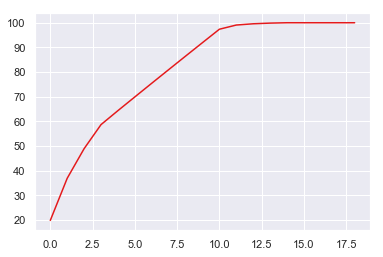

In [42]:
pca = PCA()
pca.fit(train_features)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)

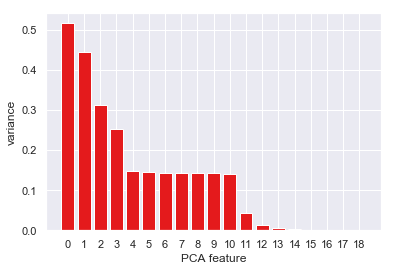

In [43]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

-  The intrinsic dimension is the number of PCA features with significant variance.
-  So from the above barplot: intrinsic dimension = 15.
-  Now we have reduced the dimension of our data.

In [49]:
pca = PCA(n_components=15)
pca.fit(train_features)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

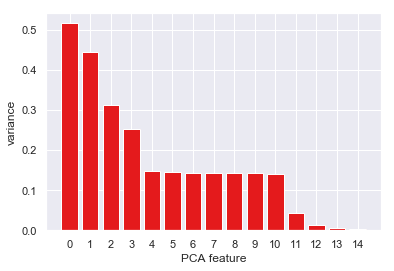

In [50]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Apply the mapping (transform) to both the training set and the test set.

In [51]:
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

In [52]:
pd.DataFrame(test_features).shape

(147, 15)

## Model Development

Regression metrics for our Models:
-  r square
-  MAE(Mean Absolute Error)
-  MSE(Mean square Error)
-  RMSE(Root Mean Square Error)
-  RMSLE( Root Mean Squared Log Error)

In [44]:
def rmsle(y,y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))
def scores(y, y_):
    print('r square  ', metrics.r2_score(y, y_))
    print('MAPE:{}'.format(np.mean(np.abs((y - y_) / y))*100))
    print('MSE:', metrics.mean_squared_error(y, y_))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_))) 
def test_scores(model):
    print('<<<------------------- Training Data Score --------------------->')
    print()
    #Predicting result on Training data
    y_pred = model.predict(train_features)
    scores(train_target_cnt,y_pred)
    print('RMSLE:',rmsle(train_target_cnt,y_pred))
    print()
    print('<<<------------------- Test Data Score --------------------->')
    print()
    # Evaluating on Test Set
    y_pred = model.predict(test_features)
    scores(test_target_cnt,y_pred)
    print('RMSLE:',rmsle(test_target_cnt,y_pred))

In [28]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Linear Regression

In [31]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'copy_X':[True, False],
          'fit_intercept':[True,False]}
# Instantiate a Decision reg classifier: reg
reg = LinearRegression()

# Instantiate the gridSearchCV object: reg_cv
reg_cv = GridSearchCV(reg, param_dist, cv=5,scoring='r2')

# Fit it to the data
reg_cv.fit(feature, target_cnt)

# Print the tuned parameters and score
print("Tuned Decision reg Parameters: {}".format(reg_cv.best_params_))
print("Best score is {}".format(reg_cv.best_score_))

Tuned Decision reg Parameters: {'copy_X': True, 'fit_intercept': True}
Best score is 0.3838273887872527


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[-0.09578977 -0.0983756   0.44703831 -0.09874077  0.03643026 -0.00716993
  0.06948043 -0.02061576 -0.01700151  0.00437814 -0.00093259  0.00956496
  0.0117245   0.01288227  0.07607201  0.03384651 -0.10991851 -0.11189981
  0.11189981]


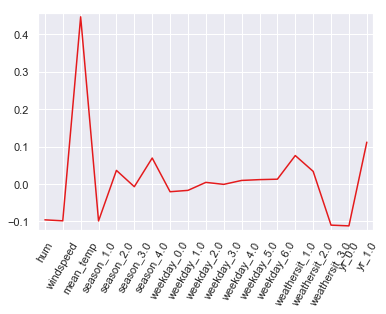

<<<------------------- Training Data Score --------------------->

r square   0.8380255588271439
MAPE:17.58782912369447
MSE: 0.006849026675949111
RMSE: 0.08275884651171203
RMSLE: 0.055782372529511744

<<<------------------- Test Data Score --------------------->

r square   0.6062558716595496
MAPE:inf
MSE: 0.018314759486588443
RMSE: 0.13533203422171872
RMSLE: 0.0884816747733433


In [45]:
# Instantiate a reg regressor: reg
reg = LinearRegression(copy_X= True, fit_intercept=True)

# Fit the regressor to the data
reg.fit(train_features,train_target_cnt)

# Compute and print the coefficients
reg_coef = reg.coef_
print(reg_coef)

# Plot the coefficients
plt.plot(range(len(feature.columns)), reg_coef)
plt.xticks(range(len(feature.columns)), feature.columns.values, rotation=60)
plt.margins(0.02)
plt.show()
test_scores(reg)

In [ ]:
# from regressors import stats
# stats.summary(reg,train_features,train_target_cnt)

Observations: 367
Training Observations: 185
Testing Observations: 182
Observations: 549
Training Observations: 367
Testing Observations: 182
Observations: 731
Training Observations: 549
Testing Observations: 182


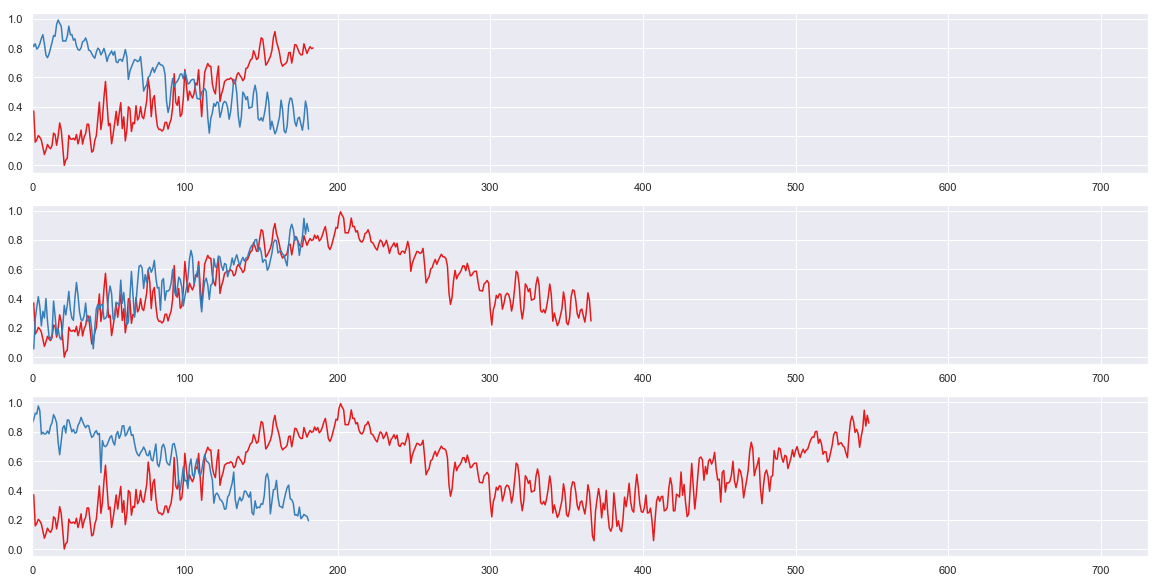

In [60]:
X = feature.values
splits = TimeSeriesSplit(n_splits=3)
plt.figure(figsize=(20,10))
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.subplot(310 + index)
    plt.xlim(0,731)
    plt.plot(pd.DataFrame(train).iloc[:,2])
    plt.plot(pd.DataFrame(test).iloc[:,2])
    index += 1
plt.show()

## Ridge Regression

In [40]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'alpha':np.logspace(-4, 0, 50),
          'normalize':[True,False],
             'max_iter':range(500,5000,500)}
# Instantiate a Decision ridge classifier: ridge
ridge = Ridge()

# Instantiate the gridSearchCV object: ridge_cv
ridge_cv = GridSearchCV(ridge, param_dist, cv=5,scoring='r2')

# Fit it to the data
ridge_cv.fit(feature, target_cnt)

# Print the tuned parameters and score
print("Tuned Decision ridge Parameters: {}".format(ridge_cv.best_params_))
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Decision ridge Parameters: {'alpha': 0.10481131341546852, 'max_iter': 500, 'normalize': True}
Best score is 0.41165254212146357


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[-0.07239348 -0.09532294  0.36425465 -0.10188669  0.04608518  0.01915229
  0.05862232 -0.01970059 -0.01552565  0.00489176 -0.0009442   0.00937853
  0.01151732  0.01062947  0.03354663 -0.01437926 -0.15159619 -0.10711533
  0.10711533]


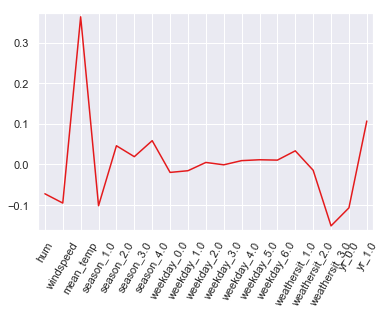

<<<------------------- Training Data Score --------------------->

r square   0.8338189641204203
MAPE: 18.183498846865508
MSE: 0.007026900908159052
RMSE: 0.0838266121715476
RMSLE: 0.05661785787801864

<<<------------------- Test Data Score --------------------->

r square   0.5724536937366584
MAPE: inf
MSE: 0.01988704644713287
RMSE: 0.14102143967189126
RMSLE: 0.09143794074174001


In [41]:
# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.10481131341546852, normalize=True,max_iter = 500)

# Fit the regressor to the data
ridge.fit(train_features,train_target_cnt)

# Compute and print the coefficients
ridge_coef = ridge.coef_
print(ridge_coef)

# Plot the coefficients
plt.plot(range(len(feature.columns)), ridge_coef)
plt.xticks(range(len(feature.columns)), feature.columns.values, rotation=60)
plt.margins(0.02)
plt.show()
test_scores(ridge)

## Lasso Regression

In [39]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'alpha':np.logspace(-4, 0, 50),
          'normalize':[True,False],
             'max_iter':range(1000,5000,500)}
# Instantiate a Decision lasso classifier: lasso
lasso = Lasso()

# Instantiate the gridSearchCV object: lasso_cv
lasso_cv = GridSearchCV(lasso, param_dist, cv=5,scoring='r2')

# Fit it to the data
lasso_cv.fit(feature, target_cnt)

# Print the tuned parameters and score
print("Tuned Decision lasso Parameters: {}".format(lasso_cv.best_params_))
print("Best score is {}".format(lasso_cv.best_score_))

Tuned Decision lasso Parameters: {'alpha': 0.0016768329368110067, 'max_iter': 1000, 'normalize': False}
Best score is 0.40677751497154


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[-0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0. -0. -0.
  0.]


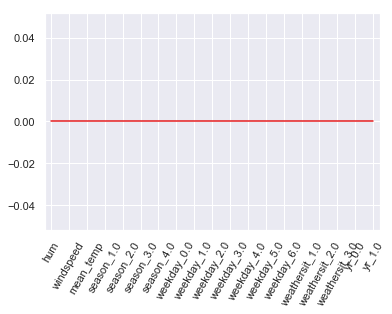

<<<------------------- Training Data Score --------------------->

r square   0.0
MAPE: 58.75695120857932
MSE: 0.04228461371038137
RMSE: 0.20563222925986424
RMSLE: 0.1416501528839825

<<<------------------- Test Data Score --------------------->

r square   -0.865700554832749
MAPE: inf
MSE: 0.08678188314775702
RMSE: 0.29458764934694226
RMSLE: 0.18443096191430738


In [34]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(train_features,train_target_cnt)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(feature.columns)), lasso_coef)
plt.xticks(range(len(feature.columns)), feature.columns.values, rotation=60)
plt.margins(0.02)
plt.show()
test_scores(lasso)

## Decision Tree Regression

In [161]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeRegressor()

# Instantiate the gridSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(feature, target_cnt)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 6, 'min_samples_split': 6}
Best score is -0.1348443516410423


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
# Instantiate a tree regressor: tree
tree = DecisionTreeRegressor(max_depth= 6, min_samples_split=6)

# Fit the regressor to the data
tree.fit(train_features,train_target_cnt)

# Compute and print the coefficients
tree_features = tree.feature_importances_
print(tree_features)

# Sort feature importances in descending order
indices = np.argsort(tree_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [feature.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,20))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(train_features).shape[1]),tree_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(train_features).shape[1]), names)
plt.show()# Make predictions
print ("error metric values For Linear Regression: ",test_scores(tree))

## Random Forest Regression

In [ ]:
# Create the random grid
random_grid = {'n_estimators': range(100,700,100),
               'max_depth': range(10,20,1),
               'min_samples_split':range(2,5,1)}
# Instantiate a Decision Forest classifier: Forest
Forest = RandomForestRegressor()

# Instantiate the gridSearchCV object: Forest_cv
Forest_cv = GridSearchCV(Forest, random_grid, cv=5)

# Fit it to the data
Forest_cv.fit(feature, target_cnt)

# Print the tuned parameters and score
print("Tuned Decision Forest Parameters: {}".format(Forest_cv.best_params_))
print("Best score is {}".format(Forest_cv.best_score_))

In [ ]:
# Instantiate a tree regressor: tree
tree = DecisionTreeRegressor(max_depth= 6, min_samples_split=6)

# Fit the regressor to the data
tree.fit(train_features,train_target_cnt)

# Compute and print the coefficients
tree_features = tree.feature_importances_
print(tree_features)

# Sort feature importances in descending order
indices = np.argsort(tree_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [feature.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,20))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(train_features).shape[1]),tree_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(train_features).shape[1]), names)
plt.show()# Make predictions
print ("error metric values For Linear Regression: ",test_scores(tree))